# Walmart Sales Prediction

---------------------------------------------------------------------------------------------------------------------------------------------------

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Dataset

In [2]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Checking Missing Values

In [4]:
df.isnull().sum()
# No null values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Checking Duplicates

In [5]:
df.duplicated().sum()
# No Duplicated Records

np.int64(0)

# Date Column

In [6]:
df['Date']

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

# Getting Date,Month and the year from the Date Feature

In [8]:
df['date'] = df['Date'].str.split('-').str[0].astype(int)
df['Month'] = df['Date'].str.split('-').str[1].astype(int)
df['Year'] = df['Date'].str.split('-').str[2].astype(int)

df.drop('Date', axis=1 , inplace=True)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   date          6435 non-null   int64  
 8   Month         6435 non-null   int64  
 9   Year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


# Unique Values for all Features

In [13]:
for cols in df.columns:
    print(f"{cols} = {df[cols].unique()}")

Store = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Weekly_Sales = [1643690.9  1641957.44 1611968.17 ...  734464.36  718125.53  760281.43]
Holiday_Flag = [0 1]
Temperature = [42.31 38.51 39.93 ... 75.87 77.55 74.09]
Fuel_Price = [2.572 2.548 2.514 2.561 2.625 2.667 2.72  2.732 2.719 2.77  2.808 2.795
 2.78  2.835 2.854 2.826 2.759 2.705 2.668 2.637 2.653 2.669 2.642 2.623
 2.608 2.64  2.627 2.692 2.664 2.619 2.577 2.565 2.582 2.624 2.603 2.633
 2.725 2.716 2.689 2.728 2.771 2.735 2.708 2.843 2.869 2.886 2.943 2.976
 2.983 3.016 3.01  2.989 3.022 3.045 3.065 3.288 3.459 3.488 3.473 3.524
 3.622 3.743 3.807 3.81  3.906 3.899 3.907 3.786 3.699 3.648 3.637 3.594
 3.48  3.575 3.651 3.682 3.684 3.638 3.554 3.523 3.533 3.546 3.526 3.467
 3.355 3.285 3.274 3.353 3.372 3.332 3.297 3.308 3.236 3.172 3.158 3.159
 3.112 3.129 3.157 3.261 3.268 3.29  3.36  3.409 3.51  3.555 3.63  3.669
 3.734 3.787 3.845 3

# Description

In [15]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000


# Univariate Analysis For numerical Featuers

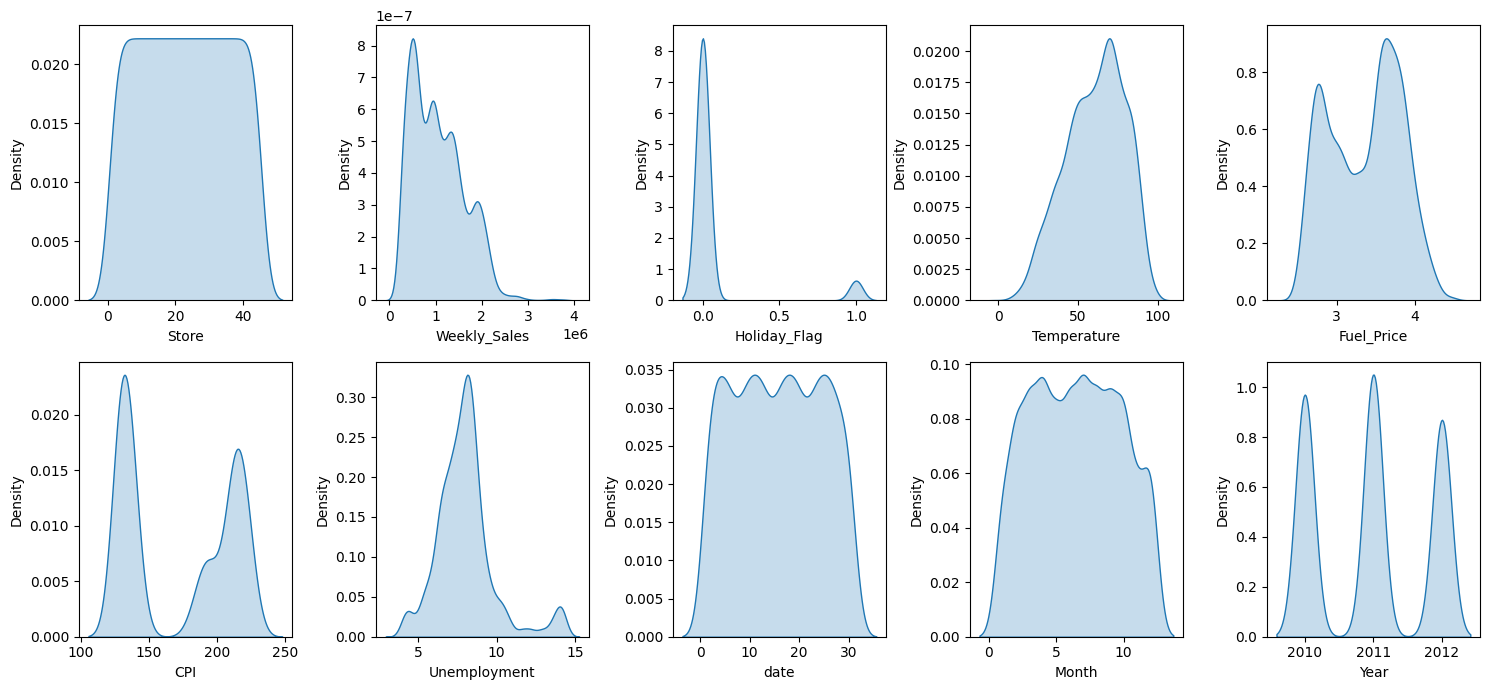

In [18]:
plt.figure(figsize=(15,7))
for i in range(len(df.columns)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(df[df.columns[i]],shade =True)
    plt.xlabel(df.columns[i])
plt.tight_layout()
plt.show()

# BoxPlot

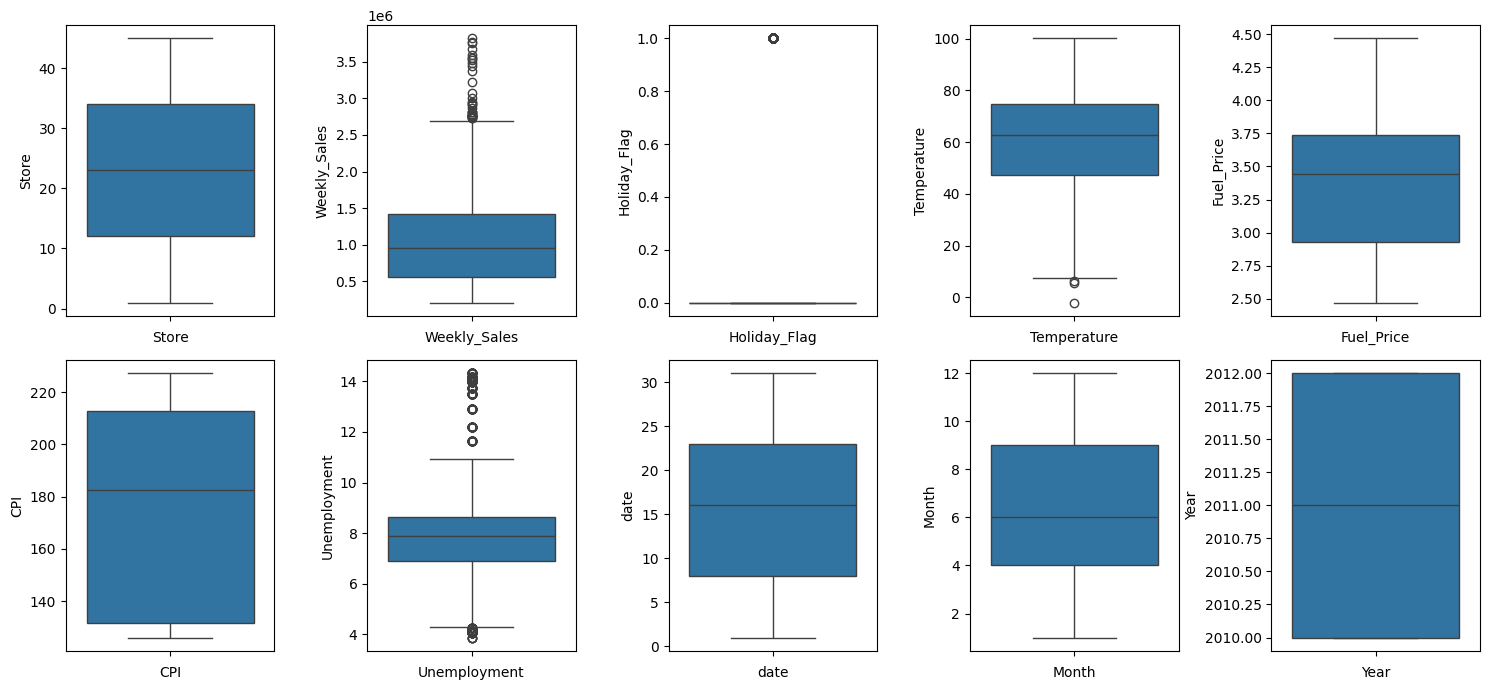

In [19]:
plt.figure(figsize=(15,7))
for i in range(len(df.columns)):
    plt.subplot(2,5,i+1)
    sns.boxplot(df[df.columns[i]])
    plt.xlabel(df.columns[i])
plt.tight_layout()
plt.show()

# Correlation

In [20]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Month,Year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,1.478526e-15,2.910676e-15,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.740946e-02,7.614332e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,4.452608e-02,1.229958e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.697332e-02,2.358618e-01,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,2.807253e-02,-4.215590e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,2.684300e-03,4.979672e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-4.233293e-03,-1.274559e-02,-2.418135e-01
date,1.478526e-15,-0.017409,4.452608e-02,0.026973,0.028073,0.002684,-0.004233,1.000000e+00,1.519184e-02,6.405867e-03
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,1.519184e-02,1.000000e+00,-1.944645e-01
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,6.405867e-03,-1.944645e-01,1.000000e+00


# Heatmap

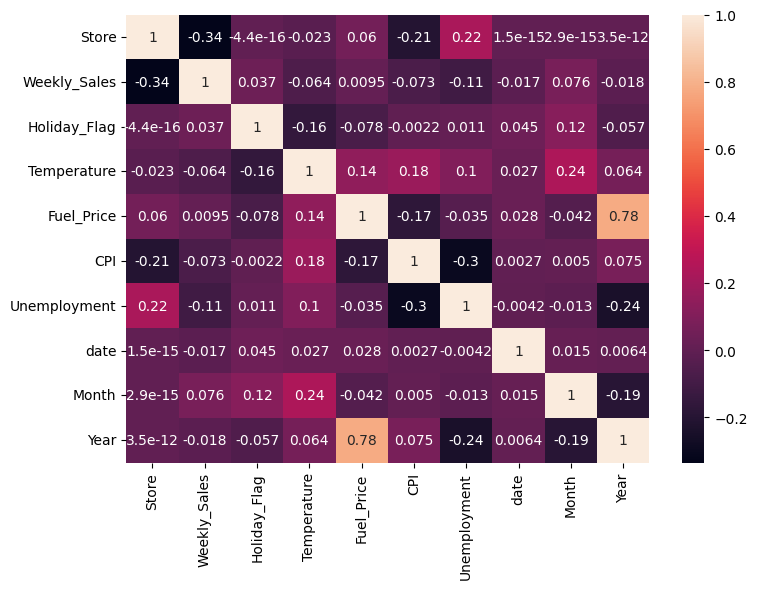

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True)
plt.tight_layout()
plt.show()

# Feature Enginnering

In [23]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'date', 'Month', 'Year'],
      dtype='object')

In [ ]:
df['Store_avg_sales'] = df.groupby('Store')['Weekles'].transform('mean')
df['Fuel_CPI_interaction'] = df['Fuel_Price'] * df['CPI']
df['Unemployment_effect'] = df['Unemployment'] * df['CPI']


In [29]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Month,Year,Store_avg_sales,Fuel_CPI_interaction,Unemployment_effect
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,1.555264e+06,542.939833,1711.147080
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,1.555264e+06,538.245049,1712.329028
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,1.555264e+06,531.180905,1712.709792
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,1.555264e+06,541.189605,1712.957025
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,1.555264e+06,554.794125,1713.204258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,7.859814e+05,767.478190,1667.445735
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012,7.859814e+05,765.799090,1665.540956
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012,7.859814e+05,769.309062,1666.900409
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,7.859814e+05,763.361160,1666.931513


In [30]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Month,Year,Store_avg_sales,Fuel_CPI_interaction,Unemployment_effect
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,1.478526e-15,2.910676e-15,3.474318e-12,-3.500999e-01,-0.160076,0.042423
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.740946e-02,7.614332e-02,-1.837754e-02,9.578180e-01,-0.055806,-0.132527
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,4.452608e-02,1.229958e-01,-5.678257e-02,1.852431e-16,-0.045642,0.008604
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.697332e-02,2.358618e-01,6.426923e-02,-4.013777e-02,0.237842,0.215572
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,2.807253e-02,-4.215590e-02,7.794703e-01,2.180554e-02,0.386129,-0.199278
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,2.684300e-03,4.979672e-03,7.479573e-02,-7.630268e-02,0.835255,0.637866
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-4.233293e-03,-1.274559e-02,-2.418135e-01,-1.058314e-01,-0.303711,0.525280
date,1.478526e-15,-0.017409,4.452608e-02,0.026973,0.028073,0.002684,-0.004233,1.000000e+00,1.519184e-02,6.405867e-03,-3.045607e-16,0.018239,-0.001743
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,1.519184e-02,1.000000e+00,-1.944645e-01,-1.443986e-15,-0.021951,-0.006633
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,6.405867e-03,-1.944645e-01,1.000000e+00,-1.145724e-12,0.496693,-0.155238


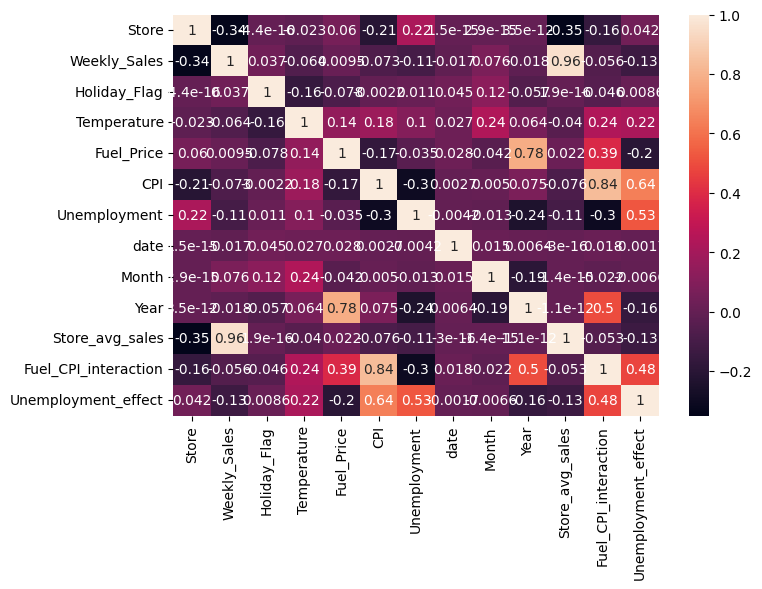

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True)
plt.tight_layout()
plt.show()

# Independent And Dependent Features

In [33]:
X = df.drop('Weekly_Sales',axis = 1)
Y = df['Weekly_Sales']
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Month,Year,Store_avg_sales,Fuel_CPI_interaction,Unemployment_effect
0,1,0,42.31,2.572,211.096358,8.106,5,2,2010,1.555264e+06,542.939833,1711.147080
1,1,1,38.51,2.548,211.242170,8.106,12,2,2010,1.555264e+06,538.245049,1712.329028
2,1,0,39.93,2.514,211.289143,8.106,19,2,2010,1.555264e+06,531.180905,1712.709792
3,1,0,46.63,2.561,211.319643,8.106,26,2,2010,1.555264e+06,541.189605,1712.957025
4,1,0,46.50,2.625,211.350143,8.106,5,3,2010,1.555264e+06,554.794125,1713.204258
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684,28,9,2012,7.859814e+05,767.478190,1667.445735
6431,45,0,64.89,3.985,192.170412,8.667,5,10,2012,7.859814e+05,765.799090,1665.540956
6432,45,0,54.47,4.000,192.327265,8.667,12,10,2012,7.859814e+05,769.309062,1666.900409
6433,45,0,56.47,3.969,192.330854,8.667,19,10,2012,7.859814e+05,763.361160,1666.931513


In [34]:
Y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

X_train 

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Month,Year,Store_avg_sales,Fuel_CPI_interaction,Unemployment_effect
6246,44,0,27.85,3.282,129.898065,6.078,16,12,2011,3.027489e+05,426.325448,789.520436
3855,27,0,66.10,4.203,142.679817,8.239,21,9,2012,1.775216e+06,599.683270,1175.539010
809,6,1,62.78,3.236,220.041741,6.551,25,11,2011,1.564728e+06,712.055075,1441.493447
1807,13,0,43.51,3.538,129.805194,6.392,4,11,2011,2.003620e+06,459.250775,829.714797
5954,42,0,68.57,3.828,129.805194,7.874,4,11,2011,5.564039e+05,496.894281,1022.086094
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,27,0,39.32,3.420,137.251185,7.827,18,2,2011,1.775216e+06,469.399052,1074.265024
5191,37,0,54.44,2.708,210.376263,8.476,3,12,2010,5.189003e+05,569.698920,1783.149205
5226,37,0,86.71,3.684,214.297294,8.177,5,8,2011,5.189003e+05,789.471231,1752.308972
5390,38,1,44.64,3.428,130.071032,12.890,30,12,2011,3.857317e+05,445.883499,1676.615606


In [38]:
Y_train

6246     311144.16
3855    1557485.75
809     2249811.55
1807    2036317.54
5954     597667.21
           ...    
3772    1709365.19
5191     508213.14
5226     510787.46
5390     342667.35
860      506760.54
Name: Weekly_Sales, Length: 4826, dtype: float64

# Standardizing

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [41]:
# Create a function to evaluate model
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

def evaluate_model(true , predicted):
    mse = mean_squared_error(true , predicted)
    mae = mean_absolute_error(true , predicted)
    rmse = np.sqrt(mse)
    score = r2_score(true,predicted)
    
    return mse , mae , rmse , score

In [48]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression , Ridge , Lasso

models = {
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "KNN Regressor" : KNeighborsRegressor(),
    "SVR" : SVR(kernel='linear', C=100, gamma=0.1, epsilon=0.1),
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" : Ridge(),
    "Lasso" : Lasso()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    model.fit(X_train , Y_train)
    
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    model_train_mse , model_train_mae , model_train_rmse , model_train_score = evaluate_model(Y_train , Y_pred_train)
    
    model_test_mse , model_test_mae , model_test_rmse , model_test_score = evaluate_model(Y_test , Y_pred_test)
    
    
    print(f"# ------------------------- {list(models.keys())[i]} -------------------------# ")
    
    print("Model Performance for training set")
    print("MSE: {:.4f}" . format(model_train_mse))
    print("MAE: {:.4f}".format(model_train_mae))
    print("RMSE: {:.4f}".format(model_train_rmse))
    print("R2-Score: {:.4f}".format(model_train_score))
    
    
    print("-"*45)
    
    print("Model Performance for test set")
    print("MSE: {:.4f}" . format(model_test_mse))
    print("MAE: {:.4f}".format(model_test_mae))
    print("RMSE: {:.4f}".format(model_test_rmse))
    print("R2-Score: {:.4f}".format(model_test_score))
    
    print("="*45)
    print("\n")

# ------------------------- AdaBoost Regressor -------------------------# 
Model Performance for training set
MSE: 26170706861.3549
MAE: 130265.4175
RMSE: 161773.6284
R2-Score: 0.9176
---------------------------------------------
Model Performance for test set
MSE: 29049753188.5045
MAE: 135659.4337
RMSE: 170439.8814
R2-Score: 0.9095


# ------------------------- Random Forest Regressor -------------------------# 
Model Performance for training set
MSE: 703980580.6793
MAE: 16768.0390
RMSE: 26532.6324
R2-Score: 0.9978
---------------------------------------------
Model Performance for test set
MSE: 5766372334.8771
MAE: 46440.5899
RMSE: 75936.6337
R2-Score: 0.9820


# ------------------------- Decision Tree Regressor -------------------------# 
Model Performance for training set
MSE: 0.0000
MAE: 0.0000
RMSE: 0.0000
R2-Score: 1.0000
---------------------------------------------
Model Performance for test set
MSE: 9458402523.6735
MAE: 60508.3382
RMSE: 97254.3188
R2-Score: 0.9705


# -------

# Observation
- Here we can see the most effective model is Random Forest Regressor and Decision Tree

# Hyperparameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV

Ada_params = {
    'n_estimators':[100,200,500,1000],
    'loss' : ['linear','square','exponential']
}
models_cv = [('AdaBoost',AdaBoostRegressor(),Ada_params)]

model_name = {}

for name,model,params in models_cv:
    rand = RandomizedSearchCV(estimator=model , param_distributions=Ada_params , cv = 3 , n_iter=100 , n_jobs=-1)
    rand.fit(X_train , Y_train)
    model_name[name] = rand.best_params_
    
for model_param in model_name:
    print("----------------------------- Best Parameters of {model_param} ----------------------------------")
    print(model_name[model_param])
    

----------------------------- Best Parameters of {model_param} ----------------------------------
{'n_estimators': 100, 'loss': 'linear'}


In [51]:
models = {
    "AdaBoost Regressor" : AdaBoostRegressor()}
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    model.fit(X_train , Y_train)
    
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    model_train_mse , model_train_mae , model_train_rmse , model_train_score = evaluate_model(Y_train , Y_pred_train)
    
    model_test_mse , model_test_mae , model_test_rmse , model_test_score = evaluate_model(Y_test , Y_pred_test)
    
    
    print(f"# ------------------------- {list(models.keys())[i]} -------------------------# ")
    
    print("Model Performance for training set")
    print("MSE: {:.4f}" . format(model_train_mse))
    print("MAE: {:.4f}".format(model_train_mae))
    print("RMSE: {:.4f}".format(model_train_rmse))
    print("R2-Score: {:.4f}".format(model_train_score))
    
    
    print("-"*45)
    
    print("Model Performance for test set")
    print("MSE: {:.4f}" . format(model_test_mse))
    print("MAE: {:.4f}".format(model_test_mae))
    print("RMSE: {:.4f}".format(model_test_rmse))
    print("R2-Score: {:.4f}".format(model_test_score))
    
    print("="*45)
    print("\n")

# ------------------------- AdaBoost Regressor -------------------------# 
Model Performance for training set
MSE: 27242150237.0125
MAE: 135751.9751
RMSE: 165051.9622
R2-Score: 0.9142
---------------------------------------------
Model Performance for test set
MSE: 30868877849.5732
MAE: 141631.7165
RMSE: 175695.4121
R2-Score: 0.9038




In [52]:
import pickle
pickle.dump(model,open("Walmart_sales_model.pkl","wb"))

# Observation 
- We did the prediction for the Walmart Sales Dataset with differnet machine leanring algorithms and got good accuracy the random forest and the decision tree were outperforming everyother
- The Accuracy with the Adaboost is 91%